In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import Image

# Load

In [2]:
data = pd.read_csv('Data/insurance.csv')

In [3]:
data.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


# EDA

In [4]:
data.shape

(1338, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* No NaN values in this data set

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


* Column "charges" shows high std

## Which age group is charged the most?

In [37]:
data['Age_Bin'] = pd.cut(data['age'], bins=5, precision=0)

In [42]:
data['Age_Bin_str'] = data['Age_Bin'].astype(str).str.replace("(", "").str.replace("]", "").str.replace(", ", "-").str.replace(".0", "")+" years"

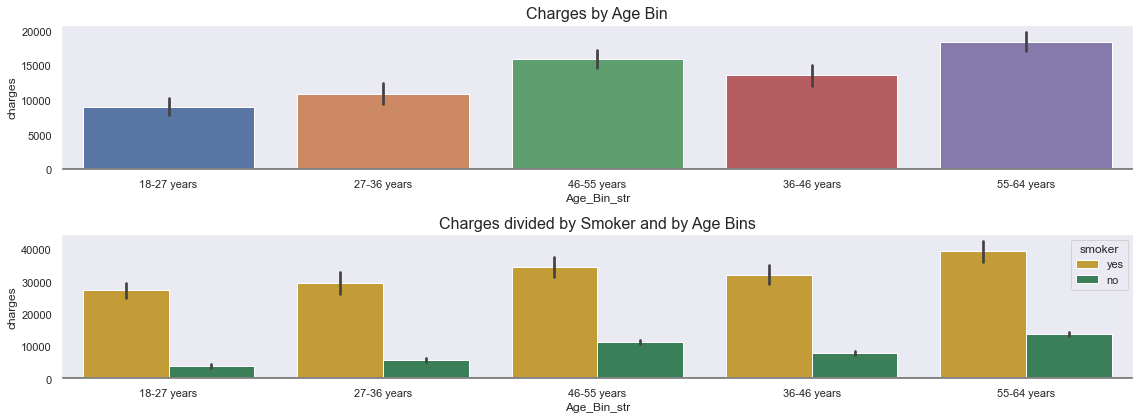

In [43]:
fig, axs = plt.subplots(2, figsize=(16,6))
axs[0].grid()
axs[0].axhline(y=0, color='grey', linewidth=4) 
axs[0].set_title('Charges by Age Bin', fontsize=16)
sns.barplot(x=data['Age_Bin_str'], y=data['charges'], ax=axs[0])

axs[1].grid()
axs[1].axhline(y=0, color='grey', linewidth=4) 
axs[1].set_title('Charges divided by Smoker and by Age Bins', fontsize=16)
sns.barplot(x=data['Age_Bin_str'], y=data['charges'], hue=data['smoker'], palette={'yes':'goldenrod', 'no':'seagreen'}, ax=axs[1])

plt.tight_layout()
plt.show()

* As expected, with the increase in age, the charges raise
* Smoking seems to have a substantial influence on the charges

## Influence of Smoking in Detail

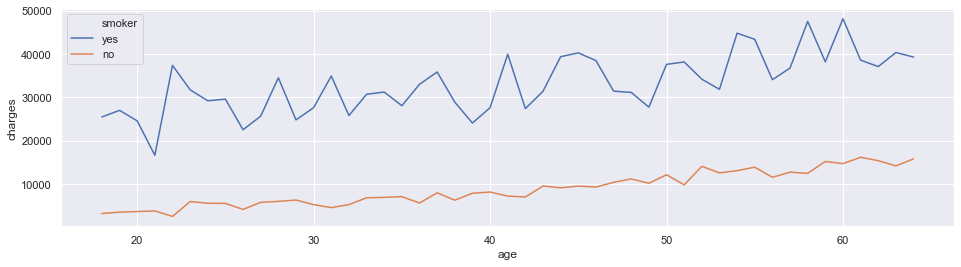

In [10]:
plt.figure(figsize=(16,4))
sns.lineplot(x='age', y='charges', data=data, hue='smoker', err_style=None)
plt.show()

* The charges for the youngest people who smoke, are higher than the charges for the oldest people who don't

## Who smokes more?

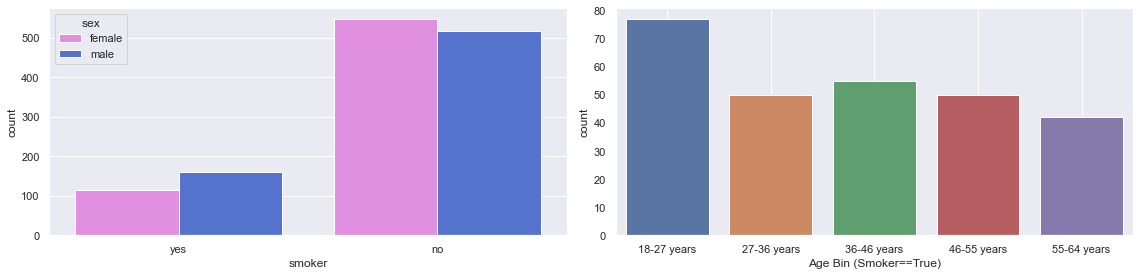

In [199]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,2,1)
sns.countplot(x=data['smoker'], hue=data['sex'], palette={'male':'royalblue', 'female':'violet'})

f.add_subplot(1,2,2)
data_smoker = data.query('smoker == "yes"')
order = data_smoker['Age_Bin_str'].value_counts().sort_index().index
sns.countplot(x=data_smoker['Age_Bin_str'], order=order)
plt.xlabel('Age Bin (Smoker==True)')

plt.grid()
plt.tight_layout()
plt.show()

* The youngest generation has the most smokers
* Men in general smoke slightly more than women

In [53]:
filt_young_smokers = (data['Age_Bin_str']=="18-27 years") & (data['smoker']=='yes')
df_young_smokers = data.loc[filt_young_smokers]

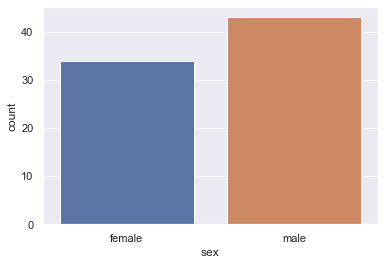

In [55]:
sns.countplot(df_young_smokers['sex'])
plt.show()

* In the youngest age group men also smoke slightly more than women
* The distribution seems to follow the general distribution of male and female smokers 

## Where are people charged the most?

In [60]:
values = data.groupby('region')['charges'].mean()
colors=['lightblue', 'lightgreen', 'bisque', 'lightcoral']

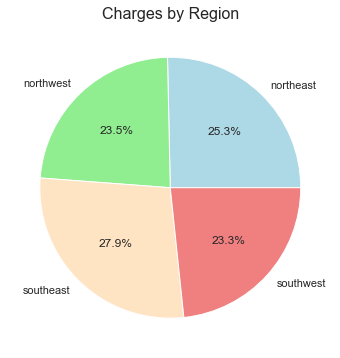

In [61]:
plt.figure(figsize=(6,6))
plt.pie(values, labels=values.index, autopct='%1.1f%%', colors=colors)
plt.title('Charges by Region', {'fontsize':16})
plt.show()

* Charges in the **Southeast** region are the highest followed by **Northeast*
* **Northwest** and **Southwest** are nearly the same

## Is bmi a critical factor?

**Here are the BMI Categories from the WHO (Wikipedia):**

<img src="img/bmi-groups-wikipedia.png" width="300" height="300" style="float:left"/>

* Change the groups so that there is only one underweight group

In [14]:
def bmi_categorizer(bmi):
    if (bmi < 18.5):
        return "Underweight"
    elif (bmi >= 18.5) and (bmi < 25):
        return "Normal weight"
    elif (bmi >= 25) and (bmi < 30):
        return "Overweight"
    elif (bmi >= 30) and (bmi < 35):
        return "Obese 1"
    elif (bmi >= 35) and (bmi < 40):
        return "Obese 2"
    elif (bmi >= 40):
        return "Obese 3"

In [15]:
data['BMI_Category'] = data['bmi'].apply(bmi_categorizer)

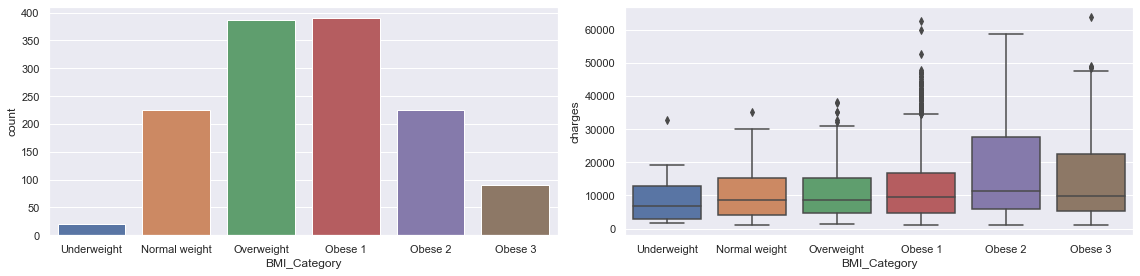

In [16]:
f = plt.figure(figsize=(16,4))
f.add_subplot(1,2,1)
sns.countplot(data['BMI_Category'], order=['Underweight', 'Normal weight', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3'])
f.add_subplot(1,2,2)
sns.boxplot(x=data['BMI_Category'], y=data['charges'], order=['Underweight', 'Normal weight', 'Overweight', 'Obese 1', 'Obese 2', 'Obese 3'])
plt.tight_layout()
plt.show()

* This dataset contains more people in Overweight/Obese BMI categories
* People in Obese BMI categories have higher charges, especially Obese 2 and Obese 3
* Charges for the Overweight category are almost identical to the Normal weight category

## What is the influence of children on the charges?

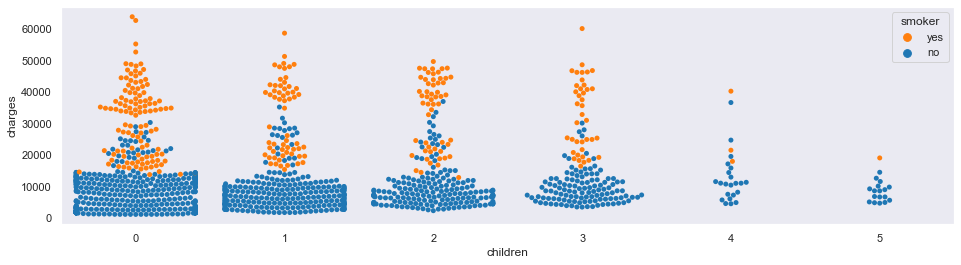

In [122]:
plt.figure(figsize=(16,4))
sns.swarmplot(x='children', y='charges',
              data=data, hue='smoker',
              palette={'yes':'tab:orange', 'no':'tab:blue'}, edgecolor="gray")
plt.grid(b=False)
plt.show()

* Children seem not to influence the charges 
* Groups with 4 and more children are significantly smaller

## Which age group lives the unhealthiest livestyle?

In [145]:
def get_livestyle(smoker, bmi_cat):
    if (smoker=='no') & (bmi_cat == 'Normal weight'):
        return 'Healthy'
    else:
        return 'Unhealthy'

In [189]:
data['livestyle'] = data.apply(lambda x: get_livestyle(x['smoker'], x['BMI_Category']), axis=1)

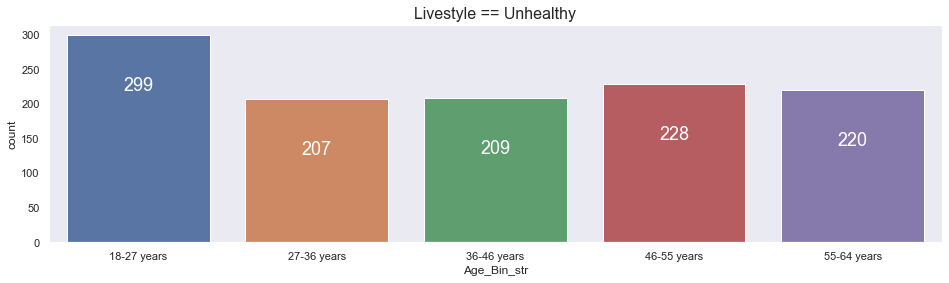

In [197]:
order = data['Age_Bin_str'].value_counts().sort_index().index
plt.figure(figsize=(16,4))

ax = sns.countplot(x='Age_Bin_str', order=order, data=data[data['livestlye']=='Unhealthy'])
for p in ax.patches:
    ax.annotate(f'\n\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
ax.grid(b=False)
ax.set_title("Livestyle == Unhealthy", fontsize=16)
plt.show()

* The youngest group lives the most unhealthy livestyle

## Where are the unhealthiest located?

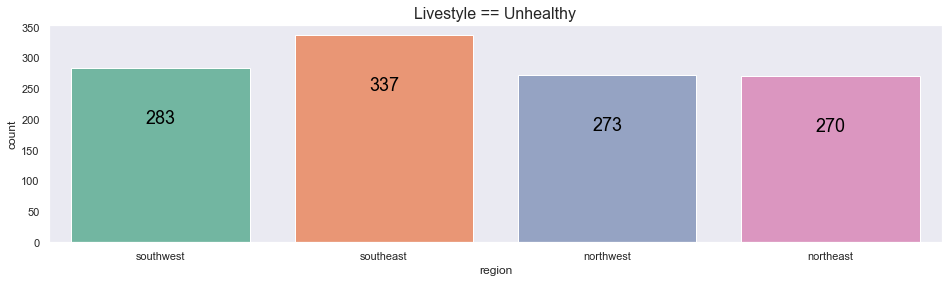

In [180]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x='region', data=data[data['livestlye']=='Unhealthy'], palette='Set2')
for p in ax.patches:
    ax.annotate(f'\n\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=18)
ax.grid(b=False)
ax.set_title("Livestyle == Unhealthy", fontsize=16)
plt.show()

* In the southeast live the most unhealthy people
* The average charges in the southeast were also the highest

## Charges Healthy vs Unhealthy

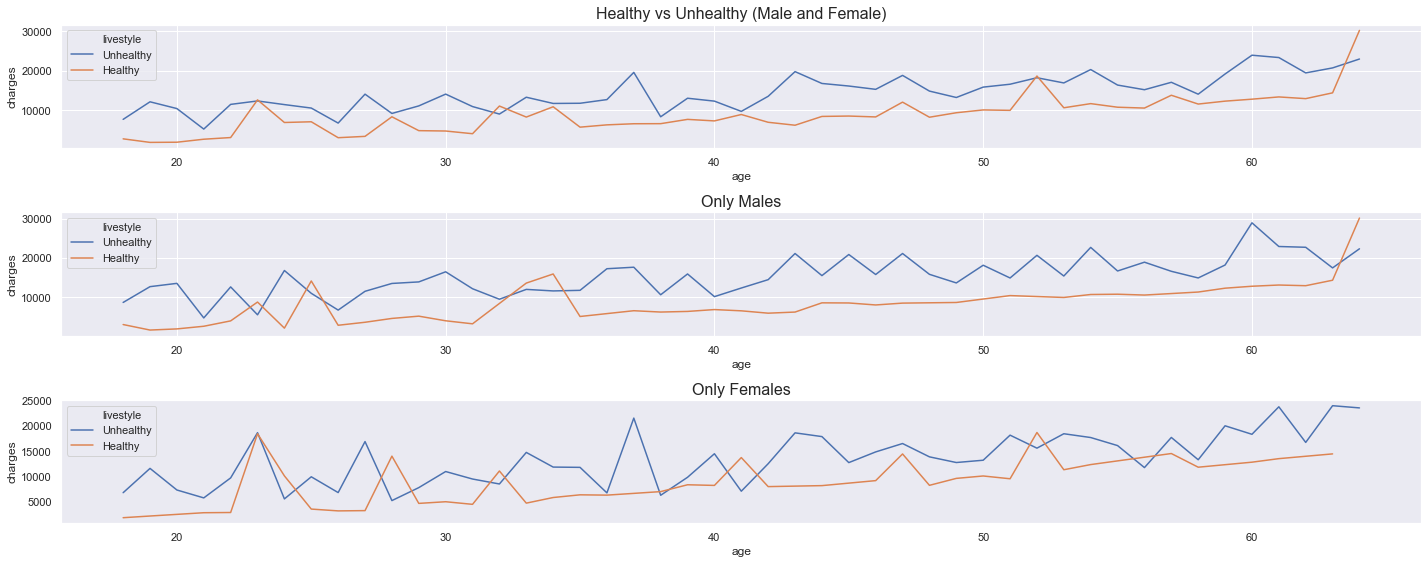

In [212]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20,8))
sns.lineplot(x='age', y='charges', hue='livestyle', data=data, err_style=None, ax=ax1)
ax1.set_title('Healthy vs Unhealthy (Male and Female)', fontsize=16)
sns.lineplot(x='age', y='charges', hue='livestyle', data=data[data['sex']=='male'], err_style=None, ax=ax2)
ax2.set_title('Only Males', fontsize=16)
sns.lineplot(x='age', y='charges', hue='livestyle', data=data[data['sex']=='female'], err_style=None, ax=ax3)
ax3.set_title('Only Females', fontsize=16)

plt.grid(b=False)
plt.tight_layout()
plt.show()

## Male vs. Female

In [200]:
data.head()

,age,sex,bmi,children,smoker,region,charges,Age_Bin,BMI_Category,Age_Bin_str,livestlye,livestyle
0,19,female,27.900,0,yes,southwest,16884.92400,"(18.0, 27.0]",Overweight,18-27 years,Unhealthy,Unhealthy
1,18,male,33.770,1,no,southeast,1725.55230,"(18.0, 27.0]",Obese 1,18-27 years,Unhealthy,Unhealthy
2,28,male,33.000,3,no,southeast,4449.46200,"(27.0, 36.0]",Obese 1,27-36 years,Unhealthy,Unhealthy
3,33,male,22.705,0,no,northwest,21984.47061,"(27.0, 36.0]",Normal weight,27-36 years,Healthy,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,"(27.0, 36.0]",Overweight,27-36 years,Unhealthy,Unhealthy
